# LV 2.

후보키

https://school.programmers.co.kr/learn/courses/30/lessons/42890


**문제 설명**

    프렌즈대학교 컴퓨터공학과 조교인 제이지는 네오 학과장님의 지시로, 학생들의 인적사항을 정리하는 업무를 담당하게 되었다.

    그의 학부 시절 프로그래밍 경험을 되살려, 모든 인적사항을 데이터베이스에 넣기로 하였고, 이를 위해 정리를 하던 중에 후보키(Candidate Key)에 대한 고민이 필요하게 되었다.

    후보키에 대한 내용이 잘 기억나지 않던 제이지는, 정확한 내용을 파악하기 위해 데이터베이스 관련 서적을 확인하여 아래와 같은 내용을 확인하였다.

    관계 데이터베이스에서 릴레이션(Relation)의 튜플(Tuple)을 유일하게 식별할 수 있는 속성(Attribute) 또는 속성의 집합 중, 다음 두 성질을 만족하는 것을 후보 키(Candidate Key)라고 한다.
    유일성(uniqueness) : 릴레이션에 있는 모든 튜플에 대해 유일하게 식별되어야 한다.
    최소성(minimality) : 유일성을 가진 키를 구성하는 속성(Attribute) 중 하나라도 제외하는 경우 유일성이 깨지는 것을 의미한다. 즉, 릴레이션의 모든 튜플을 유일하게 식별하는 데 꼭 필요한 속성들로만 구성되어야 한다.
    제이지를 위해, 아래와 같은 학생들의 인적사항이 주어졌을 때, 후보 키의 최대 개수를 구하라.

![](https://velog.velcdn.com/images/heyggun/post/45ae87da-0c02-43ab-892c-a8060ff3d5cd/image.png)

    위의 예를 설명하면, 학생의 인적사항 릴레이션에서 모든 학생은 각자 유일한 "학번"을 가지고 있다. 따라서 "학번"은 릴레이션의 후보 키가 될 수 있다.
    그다음 "이름"에 대해서는 같은 이름("apeach")을 사용하는 학생이 있기 때문에, "이름"은 후보 키가 될 수 없다. 그러나, 만약 ["이름", "전공"]을 함께 사용한다면 릴레이션의 모든 튜플을 유일하게 식별 가능하므로 후보 키가 될 수 있게 된다.
    물론 ["이름", "전공", "학년"]을 함께 사용해도 릴레이션의 모든 튜플을 유일하게 식별할 수 있지만, 최소성을 만족하지 못하기 때문에 후보 키가 될 수 없다.
    따라서, 위의 학생 인적사항의 후보키는 "학번", ["이름", "전공"] 두 개가 된다.

    릴레이션을 나타내는 문자열 배열 relation이 매개변수로 주어질 때, 이 릴레이션에서 후보 키의 개수를 return 하도록 solution 함수를 완성하라.


**제한사항**

    relation은 2차원 문자열 배열이다.
    relation의 컬럼(column)의 길이는 1 이상 8 이하이며, 각각의 컬럼은 릴레이션의 속성을 나타낸다.
    relation의 로우(row)의 길이는 1 이상 20 이하이며, 각각의 로우는 릴레이션의 튜플을 나타낸다.
    relation의 모든 문자열의 길이는 1 이상 8 이하이며, 알파벳 소문자와 숫자로만 이루어져 있다.
    relation의 모든 튜플은 유일하게 식별 가능하다.(즉, 중복되는 튜플은 없다.)


**입출력 예**

![](https://velog.velcdn.com/images/heyggun/post/97d212e3-01c2-4522-b7d6-f705508df816/image.png)


**입출력 예 설명**

    입출력 예 #1
    문제에 주어진 릴레이션과 같으며, 후보 키는 2개이다.


In [151]:
from itertools import combinations

def solution(relation):
    
    comList = []
    for i in range(1, len(relation[0])+1):
        comList.extend(combinations(range(len(relation[0])), i))
    
    candidateSet = set()
    for combination in comList:
        uniqueSet = set()
        for j in range(len(relation)):
            uniqueSet.add(tuple(relation[j][com] for com in combination))
            
        if len(uniqueSet) != len(relation):
            continue
            
        for candidate in candidateSet:
            if set(candidate).issubset(set(combination)):
                break
            
        else:
            candidateSet.add(combination)
            
    return len(candidateSet)

In [152]:
print(solution([["100","ryan","music","2"],["200","apeach","math","2"],["300","tube","computer","3"],["400","con","computer","4"],["500","muzi","music","3"],["600","apeach","music","2"]]))

2


In [148]:
from itertools import combinations

relation = [["100","ryan","music","2"],["200","apeach","math","2"],["300","tube","computer","3"],["400","con","computer","4"],["500","muzi","music","3"],["600","apeach","music","2"]]

comList = []
for i in range(1, len(relation[0])+1):
    comList.extend(combinations(range(len(relation[0])),i))

candidateSet = set()

for combination in comList:    
    uniqueSet = set()
    
    for j in range(len(relation)):
        uniqueSet.add(tuple(relation[j][com] for com in combination))
        
    if len(uniqueSet) != len(relation):
        continue
        
    for candidate in candidateSet:
        if set(candidate).issubset(set(combination)):
            break
    
    else:
        candidateSet.add(combination)
    
len(candidateSet)


2

In [127]:
from itertools import combinations


relation = [["100","ryan","music","2"],["200","apeach","math","2"],["300","tube","computer","3"],["400","con","computer","4"],["500","muzi","music","3"],["600","apeach","music","2"]]


comList = []
for i in range(1, len(relation[0])+1):
    comList.extend(combinations(range(len(relation[0])), i))

print(f"comList -> {comList}")
    
candidateSet = set()

for combination in comList:
    uniqueSet = set()
    
    for j in range(len(relation)):
        uniqueSet.add(tuple(relation[j][com] for com in combination))
    
    if len(uniqueSet) != len(relation):
        continue
    
    for candidate in candidateSet:
        if set(candidate).issubset(set(combination)):
            break
    else:
        candidateSet.add(combination)
            
    
answer = len(candidateSet)
answer

comList -> [(0,), (1,), (2,), (3,), (0, 1), (0, 2), (0, 3), (1, 2), (1, 3), (2, 3), (0, 1, 2), (0, 1, 3), (0, 2, 3), (1, 2, 3), (0, 1, 2, 3)]


2

In [153]:
from itertools import combinations


relation = [["100","ryan","music","2"],["200","apeach","math","2"],["300","tube","computer","3"],["400","con","computer","4"],["500","muzi","music","3"],["600","apeach","music","2"]]


comList = []
for i in range(1, len(relation[0])+1):
    comList.extend(combinations(range(len(relation[0])), i))
    
candidateSet = set()

for combination in comList:
    print(f"시작 ----------- combination ? -> {combination}")
    uniqueSet = set()
    
    for j in range(len(relation)):
        uniqueSet.add(tuple(relation[j][com] for com in combination))
    
    if len(uniqueSet) != len(relation):
        continue
        
    else:
        candidateSet.add(combination)

print(candidateSet)
        


시작 ----------- combination ? -> (0,)
시작 ----------- combination ? -> (1,)
시작 ----------- combination ? -> (2,)
시작 ----------- combination ? -> (3,)
시작 ----------- combination ? -> (0, 1)
시작 ----------- combination ? -> (0, 2)
시작 ----------- combination ? -> (0, 3)
시작 ----------- combination ? -> (1, 2)
시작 ----------- combination ? -> (1, 3)
시작 ----------- combination ? -> (2, 3)
시작 ----------- combination ? -> (0, 1, 2)
시작 ----------- combination ? -> (0, 1, 3)
시작 ----------- combination ? -> (0, 2, 3)
시작 ----------- combination ? -> (1, 2, 3)
시작 ----------- combination ? -> (0, 1, 2, 3)
{(0, 1), (1, 2), (0, 1, 2), (0, 1, 3), (0, 3), (0, 2, 3), (1, 2, 3), (0, 2), (0, 1, 2, 3), (0,)}


**다른 사람 풀이**

    처음에 하려고 했던 deque와 같이 푼 문제 풀이
    

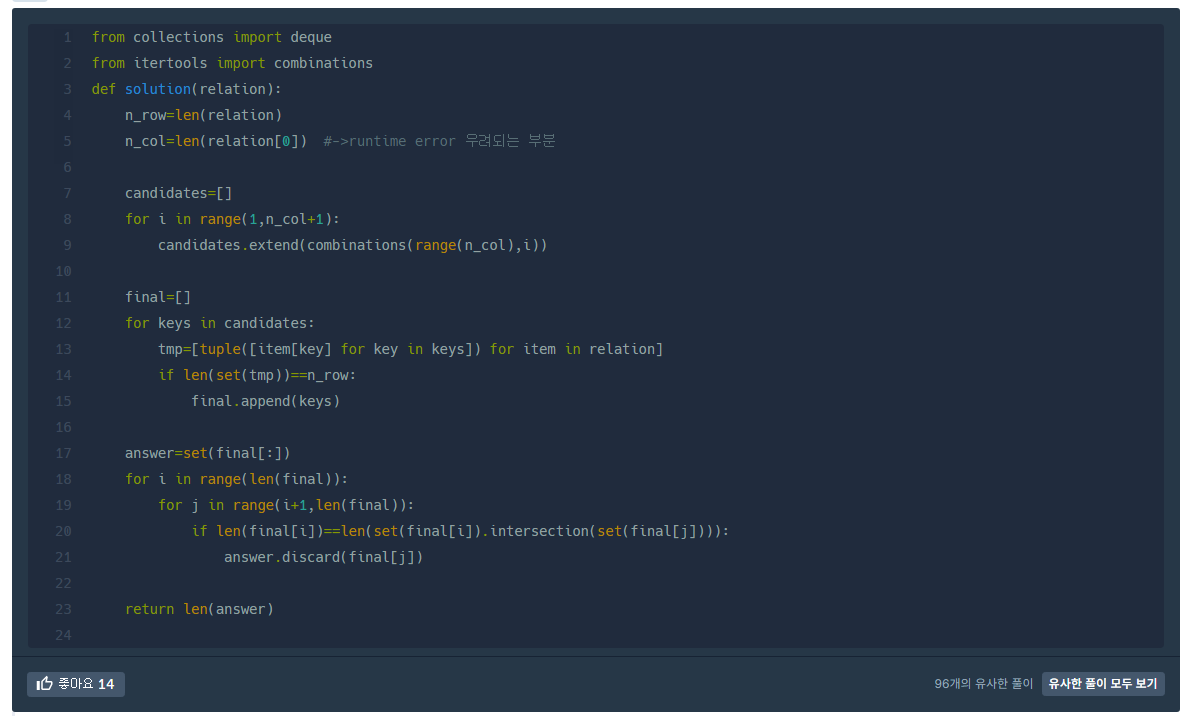

In [158]:
from collections import deque
from itertools import combinations

relation = [["100","ryan","music","2"],["200","apeach","math","2"],["300","tube","computer","3"],["400","con","computer","4"],["500","muzi","music","3"],["600","apeach","music","2"]]

candidateList = []

for i in range(1, len(relation[0])+1):
    candidateList.extend(combinations(range(len(relation[0])),i))
    
finalList = []

for keys in candidateList:
    tmp = [tuple([item[key] for key in keys])for item in relation]
    if len(set(tmp))==len(relation):
        finalList.append(keys)

print(finalList)

        
answer = set(finalList[:])

for i in range(len(finalList)):
    for j in range(i+1, len(finalList)):
        if len(finalList[i])==len(set(finalList[i]).intersection(set(finalList[j]))):
               answer.discard(finalList[j])

answer

[(0,), (0, 1), (0, 2), (0, 3), (1, 2), (0, 1, 2), (0, 1, 3), (0, 2, 3), (1, 2, 3), (0, 1, 2, 3)]


{(0,), (1, 2)}